In [1]:
import numpy as np
import matplotlib.pyplot as plt

TypeError: TypeError: object of type 'numpy.int64' has no len()

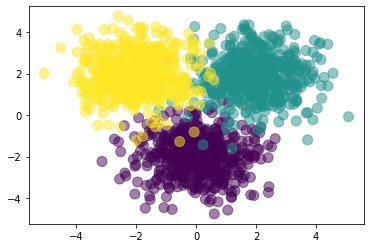

In [9]:
Nclass = 500
X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0] * Nclass + [1] * Nclass + [2] * Nclass)

plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

D = 2
M = 3
K = 3

W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

def foward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    exp_A = np.exp(A)
    Y = exp_A / exp_A.sum(axis=1, keepdims=True)
    return Y

def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in np.xrange(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

P_Y_given_X = foward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X)
assert(len(P) == len(Y))

print("Classification rate for randomly chosen weights: ", classification_rate(Y, P))